In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import scipy.stats 

from sklearn.metrics import accuracy_score


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load the data. 
white_wine = pd.read_csv('winequality-white.csv', sep=",")
red_wine = pd.read_csv('winequality-red.csv', sep=",")

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
ratings = [
    (red_wine['quality'] >= 7),
    (red_wine['quality'] <= 4)
]
quality = ['good', 'bad']
red_wine['quality'] = np.select(ratings, quality, default='average')
red_wine.quality.value_counts()

average    1319
good        217
bad          63
Name: quality, dtype: int64

In [6]:
dfo=red_wine.select_dtypes(include=['object']) # select object type columns
red_wine = pd.concat([red_wine, pd.get_dummies(dfo)], axis=1)

In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_average,quality_bad,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average,1,0,0


[Text(0.5, 1.0, 'Red wine')]

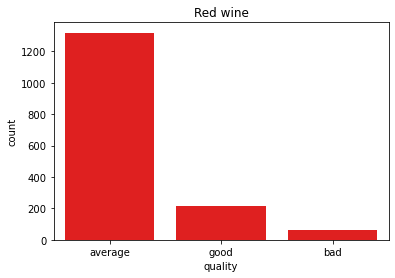

In [8]:
sns.countplot(data=red_wine, x="quality", color = 'red').set(title= "Red wine")

In [9]:
red_wine["quality"].value_counts(dropna=False, sort=True)

average    1319
good        217
bad          63
Name: quality, dtype: int64

[Text(0.5, 1.0, 'White wine')]

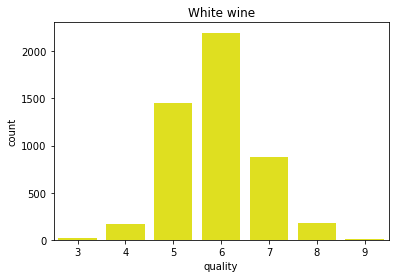

In [10]:
sns.countplot(data=white_wine, x="quality",  color = 'yellow').set(title= "White wine")

In [11]:
white_wine["quality"].value_counts(dropna=False, sort=True)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
white_wine["quality"].value_counts(dropna=False, sort=True, bins= 3)

(5.0, 7.0]                   3078
(2.9930000000000003, 5.0]    1640
(7.0, 9.0]                    180
Name: quality, dtype: int64

In [13]:
ratings = [
    (white_wine['quality'] >= 7),
    (white_wine['quality'] <= 5)
]
quality = ['good', 'bad']
white_wine['quality'] = np.select(ratings, quality, default='average')
white_wine.quality.value_counts()

average    2198
bad        1640
good       1060
Name: quality, dtype: int64

In [14]:
dfo=white_wine.select_dtypes(include=['object']) # select object type columns
white_wine = pd.concat([white_wine, pd.get_dummies(dfo)], axis=1)

In [15]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_average,quality_bad,quality_good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,average,1,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,average,1,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,average,1,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,1,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average,1,0,0


In [16]:
X_red= red_wine.drop(["quality", "quality_good", "quality_bad", "quality_average"], axis = 1)
y_red = red_wine['quality_good']


In [17]:
y.value_counts()

0    1382
1     217
Name: quality_good, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [19]:
from sklearn.dummy import DummyClassifier
red_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
red_dummy_classifier.fit(X_train,y_train)
red_dummy_score = red_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", red_dummy_score)

Dummy Score =  0.8645833333333334


In [20]:
X_white = white_wine.drop(["quality", "quality_good", "quality_bad", "quality_average"], axis = 1)
y_white= white_wine['quality_good']

In [21]:
y.value_counts()

0    3838
1    1060
Name: quality_good, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)
white_dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
white_dummy_classifier.fit(X_train,y_train)
white_dummy_score = white_dummy_classifier.score(X_test,y_test)
print("Dummy Score = ", white_dummy_score)

Dummy Score =  0.7836734693877551


In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000
...,...,...,...,...,...,...,...,...,...,...,...
7671,6.800000,0.249400,0.306733,7.259328,0.034060,33.000000,121.326662,0.991721,3.055933,0.468399,12.128663
7672,6.671440,0.207144,0.408576,8.757280,0.049857,30.714400,148.572002,0.995129,3.177120,0.688592,10.214160
7673,6.872089,0.230512,0.312279,3.435342,0.025786,40.227911,142.000000,0.991551,3.201908,0.401396,11.233031
7674,7.000000,0.150000,0.280000,14.700000,0.051000,29.000000,149.000000,0.997920,2.960000,0.390000,9.000000


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7671    1
7672    1
7673    1
7674    1
7675    1
Name: quality_good, Length: 7676, dtype: uint8